In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, font_manager as fm
plt.rcParams['figure.figsize'] = [6,3]

import plotly.graph_objects as go
from matplotlib import font_manager as fm


# Zn0 - Zero field

In [13]:
#asym_directory = 'C:\\Users\\last_d\\Downloads\\finalish_data'

### Params to tweak plotted data start here ###
# Runs to plot
run_A_min = 2460
runs_A = [ 2460, 2464, 2467, 2472 ] # 2460-2472 (inc.)
temps_A = np.array([0.0092, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 2.0])
run_B_min = 2477
runs_B = [ 2477, 2480, 2483, 2488 ] # 2477-2488   ||
temps_B = np.array([ 0.009, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.8, 2.0 ])

### Params to tweak plotted data end here #####

# load the data in
def load_sample_data(sample, runs, asym_directory):
    data = {}
    filetag = f'sample{sample}_10us'
    for i in runs:
        d = {}
        d['data'] = np.loadtxt(asym_directory + '/' + f'Results_run{i}_data_{filetag}.txt')
        d['error'] = np.loadtxt(asym_directory + '/' + f'Results_run{i}_err_{filetag}.txt')
        d['times'] = np.loadtxt(asym_directory + '/' + f'Results_run{i}_ts_{filetag}.txt') * 1e6 # to micros
        d['theory'] = np.loadtxt(asym_directory + '/' + f'Results_run{i}_theory_{filetag}.txt')
        data[i] = d
    return data

def load_sample_params(sample, asym_directory):
    d = {}
    params = ['field', 'lambda_order', 'f_order', 'lambda_unordered', 'lambda_tail', ]
    for p in params:
        d[p] = {}
        d[p]['value'] = np.loadtxt(asym_directory + '/' + f'params_{p}_sample{sample}.txt')
        d[p]['error'] = np.loadtxt(asym_directory + '/' + f'params_{p}_err_sample{sample}.txt')
    return d

asym_directoryA = 'C:\\Users\\TXB909\\Documents\\strain-cell\\PPMS_Data_and_Plotting\\Plotting\\MusrPlotting\\YBO_paper\\Davis_plotting\\plotting_data_A_actual'
asym_directoryB = 'C:\\Users\\TXB909\\Documents\\strain-cell\\PPMS_Data_and_Plotting\\Plotting\\MusrPlotting\\YBO_paper\\Davis_plotting\\plotting_data_B_actual'

data_A = load_sample_data('A', runs_A, asym_directoryA)
data_B = load_sample_data('B', runs_B, asym_directoryB)
params_A = load_sample_params('A', asym_directoryA)
params_B = load_sample_params('B', asym_directoryB)

In [14]:
# Colormap for beautiful plots
import matplotlib.colors as mcl

col_blue_face =   (222/255, 235/255, 250/255, 1)
col_blue =        (20/255,  43/255,  140/255, 1)
col_lightblue =   (52/255,  130/255, 194/255, 1)
col_teal =        (102/255, 209/255, 189/255, 1)
col_darkgreen =   (32/255,  120/255, 42/255)
col_darkpurple =  (100/255, 85/255,  255/255)
col_red_face =    (254/255, 100/255, 50/255, 1)
col_red =         (216/255, 41/255,  0/255, 1)
col_darkred =     (188/255, 26/255,  26/255)
col_violet_face = (206/255, 163/255, 211/255, 1)
col_violet =      (122/255, 30/255,  153/255, 1)
col_pink =        (192/255, 30/255,  153/255, 1)
col_green =       (86/255,  195/255, 83/255, 1)
col_black =       (0/255,   0/255,   0/255, 1)
col_orange =      (233/255, 93/255,  0/255)

# Define the colors with the values shown above
color_map = mcl.ListedColormap([col_blue, col_lightblue,col_teal, col_green, col_darkgreen, col_orange], name = 'std_col_list')
face_color_map = mcl.ListedColormap([col_blue_face, col_red_face, col_violet_face, col_black], name = 'std_face_col_list')

# Plot the data using the newly defined color map:
#plt.plot(x, y, color = color_map(<<YOUR_INDEX>>, alpha = <<YOUR_ALPHA_VALUE>>), marker = 's', markersize = 8, linestyle = '--', linewidth = LineWidth, label = r'$a$', zorder = 10)


<>:65: SyntaxWarning: invalid escape sequence '\m'
<>:81: SyntaxWarning: invalid escape sequence '\m'
<>:97: SyntaxWarning: invalid escape sequence '\m'
<>:65: SyntaxWarning: invalid escape sequence '\m'
<>:81: SyntaxWarning: invalid escape sequence '\m'
<>:97: SyntaxWarning: invalid escape sequence '\m'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_71792\2223412597.py:65: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Time ($\mathregular{\mu}$s)',fontsize=20,weight='bold')
C:\Users\TXB909\AppData\Local\Temp\ipykernel_71792\2223412597.py:81: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Time ($\mathregular{\mu}$s)',fontsize=20,weight='bold')
C:\Users\TXB909\AppData\Local\Temp\ipykernel_71792\2223412597.py:97: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Time ($\mathregular{\mu}$s)',fontsize=20,weight='bold')


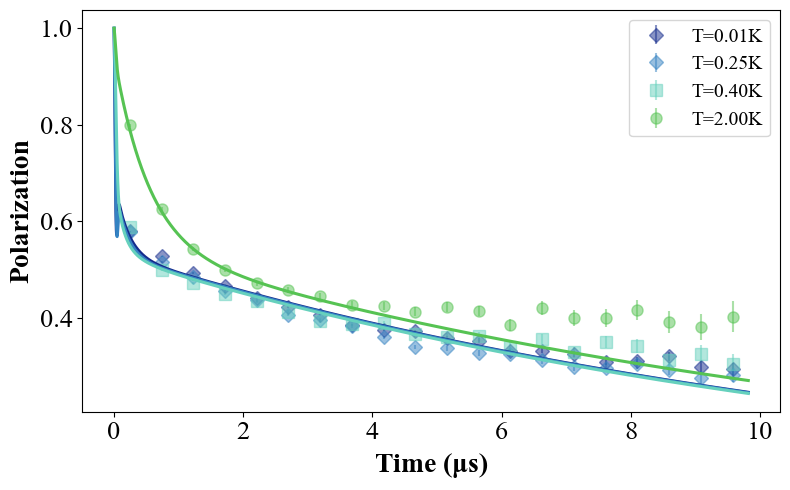

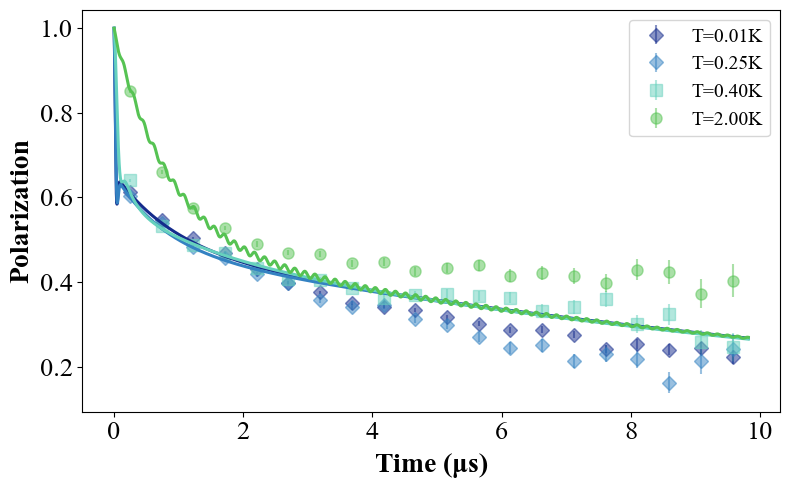

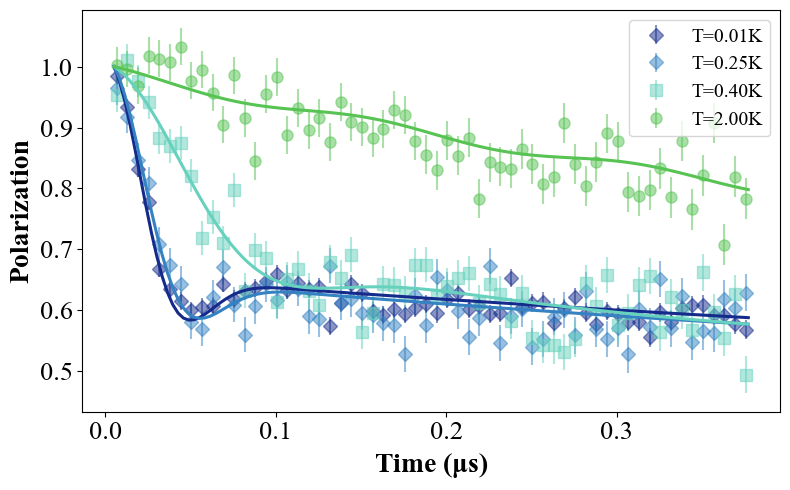

Text(0, 0.5, 'Mag. Field')

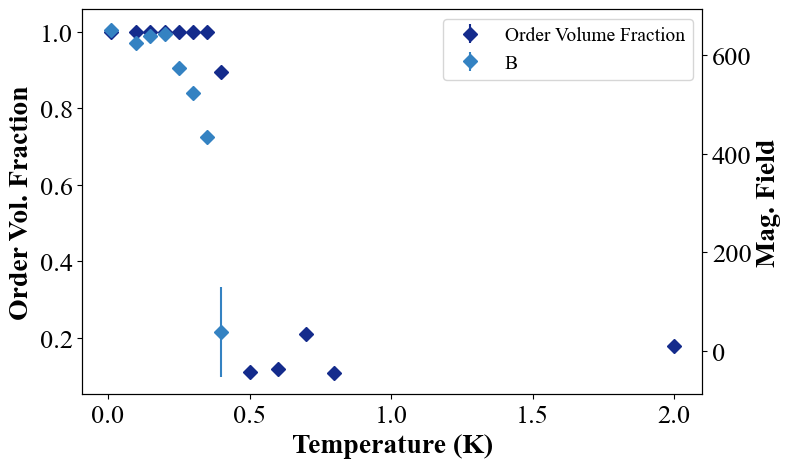

In [15]:
# Nice spectra figures

a= 'C:\\Windows\\Fonts\\times.TTF'
fprop = fm.FontProperties(fname=a)
plt.rcParams['font.family'] = fprop.get_name()
plt.rcParams['figure.figsize'] = [8,5]

plt.rc('xtick', labelsize=19)
plt.rc('ytick', labelsize=19)

def add_polarisation_to_plot(ax, data_dict, run, colormap_index, marker, markersize, label, num_points=20, start_point=0.0, end_point=10):
    # asymmetry -> polarisation
    pol = np.copy(data_dict[run]['data'])
    err = np.copy(data_dict[run]['error'])
    theory = np.copy(data_dict[run]['theory'])
    times_full = np.copy(data_dict[run]['times'])

    s_i = np.argmin(np.abs(times_full - start_point))
    e_i = np.argmin(np.abs(times_full - end_point))
    pol = pol[s_i:e_i+1]
    err = err[s_i:e_i+1]
    theory = theory[s_i:e_i+1]
    times_full = times_full[s_i:e_i+1]
    
    if(num_points > 0):
        point_division = times_full.shape[0] // num_points
        max_i = point_division*num_points
        times = times_full[:max_i]
        pol = pol[:max_i]
        err = err[:max_i]
        theory = theory[:max_i]
        times_full = times_full[:max_i]
        times = np.mean(np.reshape(times, (num_points, point_division)), axis=1)
        pol = np.mean(np.reshape(pol, (num_points, point_division)), axis=1)
        err = np.sqrt(np.sum(np.square(np.reshape(err, (num_points, point_division))), axis=1))/point_division
    else:
        times = times_full
    
    normalisation = data_dict[run]['theory'][0]
    err /= normalisation
    pol /= normalisation
    theory /= normalisation
    
    ax.errorbar(times, pol, yerr=err, linestyle='', color=color_map(colormap_index, alpha=0.5), marker=marker, markersize=markersize, label=label, zorder=1)
    ax.plot(times_full, theory, label='', color=color_map(colormap_index, alpha=1.0), linewidth=2.2, zorder=2)

def add_param_to_plot(ax, temp_list, param_dict, param, cmap_index, marker, markersize, label, end_point=-1):
    ps = param_dict[param]['value']
    es = param_dict[param]['error']
    
    if(end_point != -1):
        e_i = np.argmin(np.abs(temp_list - end_point))
        ps = ps[:e_i]
        es = es[:e_i]
        temp_list = temp_list[:e_i]
    
    ax.errorbar(temp_list, ps, yerr=es, label=label, color=color_map(cmap_index, alpha=1.0), linestyle='', markersize=markersize, marker=marker)
    
# Sample A
fig, ax = plt.subplots()
markers =     [ 'D', 'D', 's', 'o', '^', ]
markersizes = [ 7.5, 7.5, 8,   8,   9, ]
for i in range(len(runs_A)):
    add_polarisation_to_plot(ax, data_A, runs_A[i], i, markers[i], markersizes[i], f'T={temps_A[runs_A[i]-run_A_min]:.2f}K')
ax.set_xlabel('Time ($\mathregular{\mu}$s)',fontsize=20,weight='bold')
ax.set_ylabel('Polarization',fontsize=20,weight='bold')
#ax.set_xlim([0,0.5])
#ax.set_ylim([0,1.18])
#plt.figtext(0.82,0.2,'Zn0, ZF',fontsize=20)
fig.tight_layout()
ax.legend(loc='upper right',fontsize=14)
plt.savefig('Final_muSR_YbBO3_ZF_polarization_Tspectra_sampleA.png')
plt.show()

# Sample B
fig, ax = plt.subplots()
markers =     [ 'D', 'D', 's', 'o', '^', ]
markersizes = [ 7.5, 7.5, 8,   8,   9, ]
for i in range(len(runs_B)):
    add_polarisation_to_plot(ax, data_B, runs_B[i], i, markers[i], markersizes[i], f'T={temps_B[runs_B[i]-run_B_min]:.2f}K')
ax.set_xlabel('Time ($\mathregular{\mu}$s)',fontsize=20,weight='bold')
ax.set_ylabel('Polarization',fontsize=20,weight='bold')
#ax.set_xlim([0,0.5])
#ax.set_ylim([0,1.18])
#plt.figtext(0.82,0.2,'Zn0, ZF',fontsize=20)
fig.tight_layout()
ax.legend(loc='upper right',fontsize=14)
plt.savefig('Final_muSR_YbBO3_ZF_polarization_Tspectra_sampleB.png')
plt.show()

# Sample A, 0-0.4us
fig, ax = plt.subplots()
markers =     [ 'D', 'D', 's', 'o', '^', ]
markersizes = [ 7.5, 7.5, 8,   8,   9, ]
for i in range(len(runs_B)):
    add_polarisation_to_plot(ax, data_B, runs_B[i], i, markers[i], markersizes[i], f'T={temps_B[runs_B[i]-run_B_min]:.2f}K', end_point=0.4, num_points=60)
ax.set_xlabel('Time ($\mathregular{\mu}$s)',fontsize=20,weight='bold')
ax.set_ylabel('Polarization',fontsize=20,weight='bold')
#ax.set_xlim([0,0.5])
#ax.set_ylim([0,1.18])
#plt.figtext(0.82,0.2,'Zn0, ZF',fontsize=20)
fig.tight_layout()
ax.legend(loc='upper right',fontsize=14)
plt.savefig('Final_muSR_YbBO3_ZF_polarization_Tspectra_sampleB.png')
plt.show()

# parameters: field & order parameter
fig, ax = plt.subplots()
ax2 = ax.twinx()
add_param_to_plot(ax, temps_A, params_A, 'f_order', 0, 'D', 7.5, 'Order Volume Fraction')
add_param_to_plot(ax2, temps_A, params_A, 'field', 1, 'D', 7.5, 'B', end_point=0.5)
# lambda_order, lambda_unordered, lambda_tail, lambda_Ag, field, f_order
ax.set_xlabel('Temperature (K)',fontsize=20,weight='bold')
ax.set_ylabel('Order Vol. Fraction',fontsize=20,weight='bold')
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1+lines2, labels1+labels2, loc='upper right',fontsize=14)
ax2.set_ylabel('Mag. Field',fontsize=20,weight='bold')